In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
import os 
os.getcwd()

'/Users/syang14/Library/CloudStorage/OneDrive-stevens.edu/CurCourses/Stevens/FE670-2023F/Lecture-10/Py-Code'

In [72]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
import matplotlib.pyplot as plt
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

In [73]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [74]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
y.head()

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [77]:
y = pd.get_dummies(y)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [79]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
dot_data = StringIO()
dot_data

In [81]:
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
#(graph, ) = graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

In [82]:
y_pred = dt.predict(X_test)

In [83]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [84]:
stocks = pd.read_csv('SP20-2017-2021.csv', index_col=0).dropna()
stocks.head()

,CHK,AMD,LNT,FCX,VRTX,WMB,INCY,NFLX,MRO,MU,MCD,BRK-B,SO,T,KO,PG,JNJ,WM,RSG,PEP
Date,,,,,,,,,,,,,,,,,,,,
2021-02-10,44.391636,92.349998,48.087662,31.039978,212.529999,21.733746,85.169998,563.590027,8.991327,82.235046,210.763016,239.919998,59.088921,27.040606,48.456974,125.828545,163.775208,112.275978,89.450478,134.695145
2021-02-11,42.230759,92.660004,47.686279,30.791580,210.500000,21.228754,84.989998,557.590027,8.655018,86.359291,210.635223,239.759995,59.438042,27.173206,49.140846,125.936493,163.038849,111.811829,90.211380,132.024719
2021-02-12,41.944618,93.769997,47.275108,31.030041,213.979996,21.762329,84.330002,556.520020,8.872630,87.887154,210.271484,242.460007,58.899033,27.277388,49.521854,125.239731,163.549393,111.841461,90.181740,130.948730
2021-02-16,42.970787,91.459999,46.814983,32.689350,210.270004,21.829025,82.129997,557.280029,9.478032,87.617523,211.382324,245.279999,58.115017,27.438400,49.111538,125.534134,162.066864,111.199532,89.312126,131.447617
2021-02-17,43.671341,89.940002,47.216366,33.931351,214.850006,22.000534,83.769997,551.340027,9.507807,85.929886,209.829117,245.250000,58.085617,28.006681,48.974762,126.064072,162.646118,110.814392,89.015678,131.525864


In [85]:
returns = np.log(stocks/stocks.shift(1)).dropna(how="any")
returns.head()

,CHK,AMD,LNT,FCX,VRTX,WMB,INCY,NFLX,MRO,MU,MCD,BRK-B,SO,T,KO,PG,JNJ,WM,RSG,PEP
Date,,,,,,,,,,,,,,,,,,,,
2021-02-11,-0.049902,0.003351,-0.008382,-0.008035,-0.009597,-0.023510,-0.002116,-0.010703,-0.038121,0.048935,-0.000607,-0.000667,0.005891,0.004892,0.014014,0.000858,-0.004506,-0.004143,0.008470,-0.020025
2021-02-12,-0.006799,0.011908,-0.008660,0.007715,0.016397,0.024824,-0.007796,-0.001921,0.024832,0.017537,-0.001728,0.011198,-0.009110,0.003827,0.007723,-0.005548,0.003127,0.000265,-0.000329,-0.008183
2021-02-16,0.024170,-0.024943,-0.009781,0.052094,-0.017490,0.003060,-0.026434,0.001365,0.066005,-0.003073,0.005269,0.011564,-0.013401,0.005885,-0.008320,0.002348,-0.009106,-0.005756,-0.009690,0.003803
2021-02-17,0.016172,-0.016759,0.008537,0.037290,0.021548,0.007826,0.019772,-0.010716,0.003137,-0.019449,-0.007375,-0.000122,-0.000506,0.020500,-0.002789,0.004213,0.003568,-0.003470,-0.003325,0.000595
2021-02-18,-0.028881,-0.014560,0.007848,-0.000293,-0.023642,-0.036608,-0.026859,-0.005675,-0.049208,0.028526,0.009233,-0.007161,0.009738,-0.011565,0.012686,0.008295,0.000483,0.010814,0.018042,0.006745


In [86]:
vols = returns.std()
vols

CHK      0.022206
AMD      0.024104
LNT      0.011296
FCX      0.031717
VRTX     0.015064
WMB      0.013904
INCY     0.017455
NFLX     0.016465
MRO      0.034115
MU       0.023886
MCD      0.009132
BRK-B    0.009786
SO       0.009075
T        0.010926
KO       0.008009
PG       0.008599
JNJ      0.008355
WM       0.009751
RSG      0.010043
PEP      0.008631
dtype: float64

In [87]:
np.sort(vols) # MRO has the highest volatility - Marathon Oil Corporation

array([0.00800875, 0.00835496, 0.00859905, 0.00863055, 0.0090748 ,
       0.00913154, 0.00975105, 0.00978635, 0.0100435 , 0.0109258 ,
       0.0112962 , 0.01390446, 0.01506361, 0.0164654 , 0.01745539,
       0.02220569, 0.02388571, 0.02410355, 0.03171715, 0.03411451])

In [88]:
MRO = stocks[['MRO']]
MRO = MRO.rename(columns={'MRO': 'MRO_PRICE'})

In [89]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

In [90]:
MRO['RSI'] = get_rsi(stocks.MRO, 14)
MRO = MRO.dropna()

In [91]:
MRO.head()

,MRO_PRICE,RSI
Date,,
2021-02-17,9.507807,74.326975
2021-02-18,9.051272,50.605267
2021-02-19,9.378786,60.375482
2021-02-22,10.123134,73.301031
2021-02-23,11.075900,81.582548


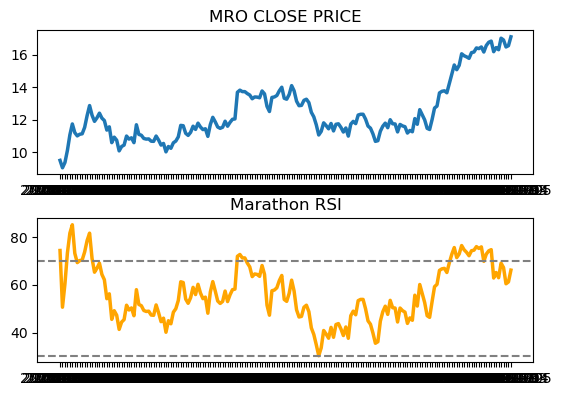

In [92]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(MRO['MRO_PRICE'], linewidth = 2.5)
ax1.set_title('MRO CLOSE PRICE')
ax2.plot(MRO['RSI'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('Marathon RSI')
plt.show()

In [93]:
# install pandas_ta: pip3 install pandas-ta
import pandas_ta as ta

In [94]:
# List of all indicators
pd.DataFrame().ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [95]:
help(ta.rsi)

Help on function rsi in module pandas_ta.momentum.rsi:

rsi(close, length=None, scalar=None, talib=None, drift=None, offset=None, **kwargs)
    Relative Strength Index (RSI)
    
    The Relative Strength Index is popular momentum oscillator used to measure the
    velocity as well as the magnitude of directional price movements.
    
    Sources:
        https://www.tradingview.com/wiki/Relative_Strength_Index_(RSI)
    
    Calculation:
        Default Inputs:
            length=14, scalar=100, drift=1
        ABS = Absolute Value
        RMA = Rolling Moving Average
    
        diff = close.diff(drift)
        positive = diff if diff > 0 else 0
        negative = diff if diff < 0 else 0
    
        pos_avg = RMA(positive, length)
        neg_avg = ABS(RMA(negative, length))
    
        RSI = scalar * pos_avg / (pos_avg + neg_avg)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 14
        scalar (float): How much to magnify.

In [96]:
MRO['TA-RSI'] = ta.rsi(stocks.MRO, 14)

In [97]:
MRO.head()

,MRO_PRICE,RSI,TA-RSI
Date,,,
2021-02-17,9.507807,74.326975,NaN
2021-02-18,9.051272,50.605267,NaN
2021-02-19,9.378786,60.375482,NaN
2021-02-22,10.123134,73.301031,NaN
2021-02-23,11.075900,81.582548,NaN


In [98]:
help(ta.ema)

Help on function ema in module pandas_ta.overlap.ema:

ema(close, length=None, talib=None, offset=None, **kwargs)
    Exponential Moving Average (EMA)
    
    The Exponential Moving Average is more responsive moving average compared to the
    Simple Moving Average (SMA).  The weights are determined by alpha which is
    proportional to it's length.  There are several different methods of calculating
    EMA.  One method uses just the standard definition of EMA and another uses the
    SMA to generate the initial value for the rest of the calculation.
    
    Sources:
        https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:moving_averages
        https://www.investopedia.com/ask/answers/122314/what-exponential-moving-average-ema-formula-and-how-ema-calculated.asp
    
    Calculation:
        Default Inputs:
            length=10, adjust=False, sma=True
        if sma:
            sma_nth = close[0:length].sum() / length
            close[:length - 1] = n

In [99]:
MRO['EMA14']  = ta.ema(stocks.MRO, 14)

In [100]:
MRO['EMA22'] = ta.ema(stocks.MRO, 22)

In [101]:
MRO.head(20)

,MRO_PRICE,RSI,TA-RSI,EMA14,EMA22
Date,,,,,
2021-02-17,9.507807,74.326975,NaN,NaN,NaN
2021-02-18,9.051272,50.605267,NaN,NaN,NaN
2021-02-19,9.378786,60.375482,NaN,NaN,NaN
2021-02-22,10.123134,73.301031,NaN,NaN,NaN
2021-02-23,11.075900,81.582548,NaN,NaN,NaN
2021-02-24,11.750775,85.106526,NaN,NaN,NaN
2021-02-25,11.214845,73.138573,NaN,NaN,NaN
2021-02-26,11.016353,69.254188,NaN,NaN,NaN
2021-03-01,11.115599,70.109001,NaN,NaN,NaN


In [102]:
help(ta.ppo)

Help on function ppo in module pandas_ta.momentum.ppo:

ppo(close, fast=None, slow=None, signal=None, scalar=None, mamode=None, talib=None, offset=None, **kwargs)
    Percentage Price Oscillator (PPO)
    
    The Percentage Price Oscillator is similar to MACD in measuring momentum.
    
    Sources:
        https://www.tradingview.com/wiki/MACD_(Moving_Average_Convergence/Divergence)
    
    Calculation:
        Default Inputs:
            fast=12, slow=26
        SMA = Simple Moving Average
        EMA = Exponential Moving Average
        fast_sma = SMA(close, fast)
        slow_sma = SMA(close, slow)
        PPO = 100 * (fast_sma - slow_sma) / slow_sma
        Signal = EMA(PPO, signal)
        Histogram = PPO - Signal
    
    Args:
        close(pandas.Series): Series of 'close's
        fast(int): The short period. Default: 12
        slow(int): The long period. Default: 26
        signal(int): The signal period. Default: 9
        scalar (float): How much to magnify. Default: 10

In [103]:
PPO = ta.ppo(stocks.MRO)

In [104]:
help(ta.macd)

Help on function macd in module pandas_ta.momentum.macd:

macd(close, fast=None, slow=None, signal=None, talib=None, offset=None, **kwargs)
    Moving Average Convergence Divergence (MACD)
    
    The MACD is a popular indicator to that is used to identify a security's trend.
    While APO and MACD are the same calculation, MACD also returns two more series
    called Signal and Histogram. The Signal is an EMA of MACD and the Histogram is
    the difference of MACD and Signal.
    
    Sources:
        https://www.tradingview.com/wiki/MACD_(Moving_Average_Convergence/Divergence)
        AS Mode: https://tr.tradingview.com/script/YFlKXHnP/
    
    Calculation:
        Default Inputs:
            fast=12, slow=26, signal=9
        EMA = Exponential Moving Average
        MACD = EMA(close, fast) - EMA(close, slow)
        Signal = EMA(MACD, signal)
        Histogram = MACD - Signal
    
        if asmode:
            MACD = MACD - Signal
            Signal = EMA(MACD, signal)
          

In [105]:
MACD =ta.macd(stocks.MRO)

In [106]:
help(ta.cmo)

Help on function cmo in module pandas_ta.momentum.cmo:

cmo(close, length=None, scalar=None, talib=None, drift=None, offset=None, **kwargs)
    Chande Momentum Oscillator (CMO)
    
    Attempts to capture the momentum of an asset with overbought at 50 and
    oversold at -50.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/chande-momentum-oscillator-cmo/
        https://www.tradingview.com/script/hdrf0fXV-Variable-Index-Dynamic-Average-VIDYA/
    
    Calculation:
        Default Inputs:
            drift=1, scalar=100
    
        # Same Calculation as RSI except for this step
        CMO = scalar * (PSUM - NSUM) / (PSUM + NSUM)
    
    Args:
        close (pd.Series): Series of 'close's
        scalar (float): How much to magnify. Default: 100
        talib (bool): If TA Lib is installed and talib is True, Returns the TA Lib
            version. If TA Lib is not installed but talib is True, it runs the Python
            ve

In [107]:
CMO = ta.cmo(stocks.MRO)

In [108]:
MRO_RETURN = returns[['MRO']]
MRO_RETURN = MRO_RETURN.rename(columns={'MRO': 'MRO_RETURN'})
MRO_RETURN.head()

,MRO_RETURN
Date,
2021-02-11,-0.038121
2021-02-12,0.024832
2021-02-16,0.066005
2021-02-17,0.003137
2021-02-18,-0.049208


In [109]:
data = pd.concat([MRO_RETURN, MRO, PPO, MACD, CMO], axis=1)

In [110]:
data.tail(20)

,MRO_RETURN,MRO_PRICE,RSI,TA-RSI,EMA14,EMA22,PPO_12_26_9,PPOh_12_26_9,PPOs_12_26_9,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,CMO_14
Date,,,,,,,,,,,,,
2021-10-12,-0.004398,15.880000,73.565247,73.565247,14.638906,14.014063,11.806846,3.193606,8.613240,1.051250,0.236174,0.815075,47.130494
2021-10-13,-0.005684,15.790000,72.136816,72.136816,14.792385,14.168492,11.780430,2.533752,9.246678,1.049262,0.187349,0.861913,44.273631
2021-10-14,0.021924,16.139999,74.232241,74.232241,14.972067,14.339928,11.673927,1.941799,9.732128,1.063667,0.161403,0.902263,48.464481
2021-10-15,0.002475,16.180000,74.468563,74.468563,15.133125,14.499934,11.613779,1.505321,10.108458,1.066022,0.131007,0.935015,48.937125
2021-10-18,0.015333,16.430000,75.952939,75.952939,15.306042,14.667766,11.674508,1.252840,10.421668,1.075662,0.112518,0.963145,51.905878
2021-10-19,-0.002438,16.389999,75.199585,75.199585,15.450569,14.817525,11.632407,0.968591,10.663816,1.067766,0.083697,0.984069,50.399171
2021-10-20,0.006083,16.490000,75.844622,75.844622,15.589160,14.962958,11.171507,0.406153,10.765354,1.057388,0.058655,0.998733,51.689244
2021-10-21,-0.018978,16.180000,69.785179,69.785179,15.667939,15.068788,10.583016,-0.145870,10.728887,1.012478,0.010996,1.001482,39.570358
2021-10-22,0.024421,16.580000,72.804369,72.804369,15.789547,15.200197,10.193243,-0.428515,10.621758,0.997663,-0.003055,1.000718,45.608737


In [111]:
data.head(40)

,MRO_RETURN,MRO_PRICE,RSI,TA-RSI,EMA14,EMA22,PPO_12_26_9,PPOh_12_26_9,PPOs_12_26_9,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,CMO_14
Date,,,,,,,,,,,,,
2021-02-11,-0.038121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-12,0.024832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-16,0.066005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-17,0.003137,9.507807,74.326975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-18,-0.049208,9.051272,50.605267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-19,0.035545,9.378786,60.375482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-22,0.076373,10.123134,73.301031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-23,0.089948,11.075900,81.582548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-24,0.059148,11.750775,85.106526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


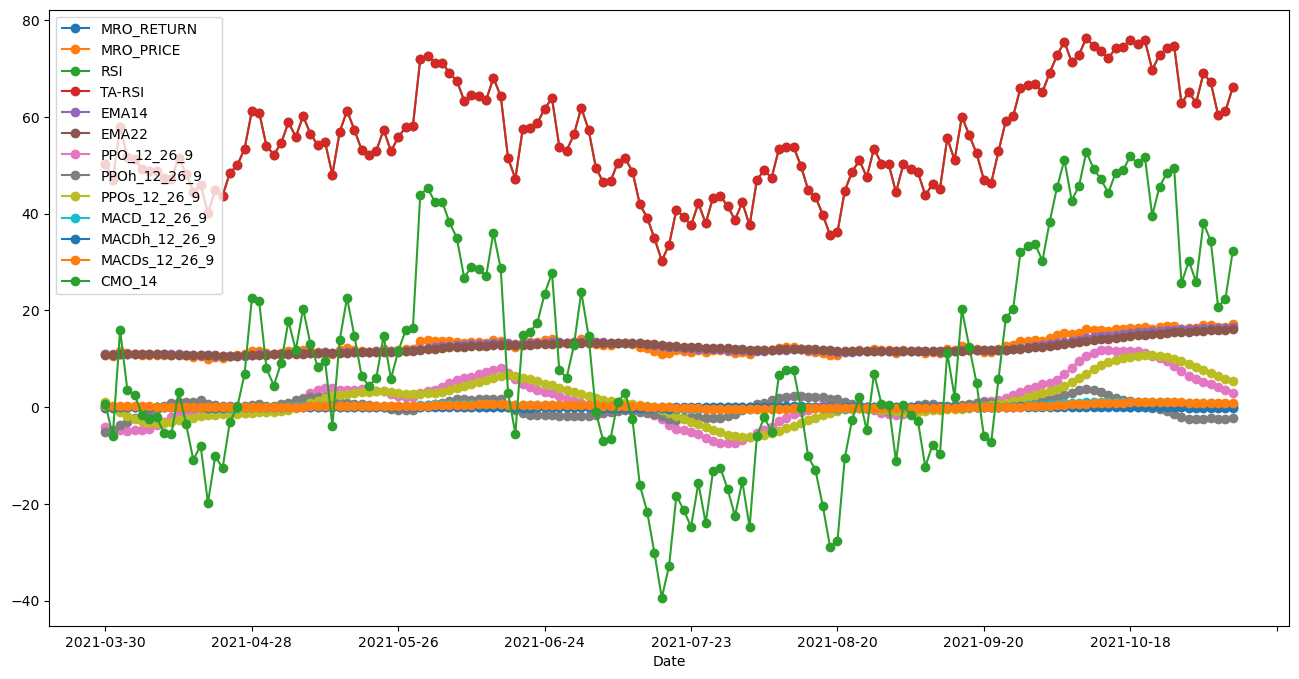

In [112]:
data = data.dropna()
data.plot(style="-o", figsize=(16, 8));

In [113]:
print(data.columns.values)

['MRO_RETURN' 'MRO_PRICE' 'RSI' 'TA-RSI' 'EMA14' 'EMA22' 'PPO_12_26_9'
 'PPOh_12_26_9' 'PPOs_12_26_9' 'MACD_12_26_9' 'MACDh_12_26_9'
 'MACDs_12_26_9' 'CMO_14']


In [114]:
# In this code, we will be creating a Random Forest Classifier and train it to give the daily returns.
from sklearn.ensemble import RandomForestClassifier

In [115]:
# X is the input variable
X = data[[ 'MRO_PRICE', 'RSI', 'TA-RSI', 'EMA14', 'EMA22', 'PPO_12_26_9',
 'PPOh_12_26_9', 'PPOs_12_26_9', 'MACD_12_26_9', 'MACDh_12_26_9',
 'MACDs_12_26_9', 'CMO_14']]

# Y is the target or output variable
y = np.where(data['MRO_PRICE'].shift(-1) > data['MRO_PRICE'], 1, -1)

In [116]:
y

array([-1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,
       -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
        1, -1])

In [117]:
# Total dataset length
dataset_length = data.shape[0]

# Training dataset length
split = int(dataset_length * 0.75)
split

116

In [118]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(116, 12) (39, 12)
(116,) (39,)


In [119]:
clf = RandomForestClassifier(random_state=5)

In [120]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

In [121]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  41.02564102564102


In [122]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.41      0.94      0.57        16
           1       0.50      0.04      0.08        23

    accuracy                           0.41        39
   macro avg       0.45      0.49      0.32        39
weighted avg       0.46      0.41      0.28        39



In [58]:
data['strategy_returns'] = data.MRO_PRICE.pct_change().shift(-1) * model.predict(X)

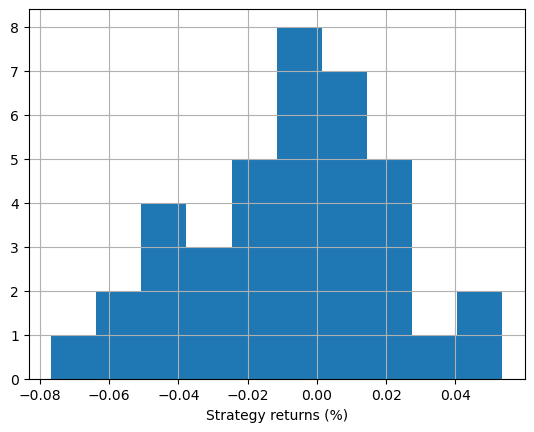

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()

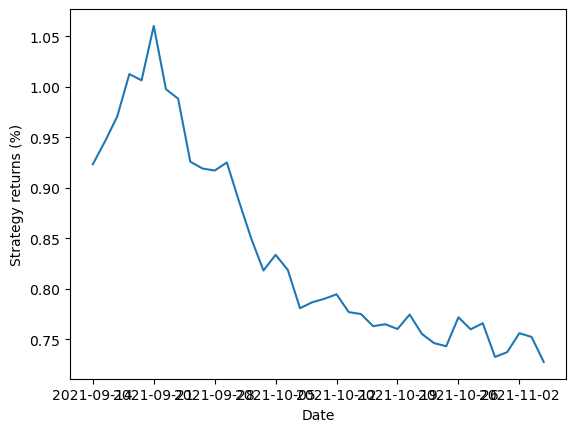

In [60]:
(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()

In [64]:
symbols = ['GOOGL', 'TSLA', 'FB', 'AMZN', 'AAPL', 'MSFT', 'VOD',  'ADBE', 'NVDA', 'CRM' ]
 
all_stocks = pd.DataFrame()

In [65]:
import yfinance as yf

In [66]:
start = pd.Timestamp('2015-01')
end = pd.Timestamp('2020-12')
data_source = 'yahoo'

In [67]:
all_stocks = yf.download(symbols, start=start, end=end)

[*********************100%%**********************]  10 of 10 completed


1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [68]:
all_stocks.head()

Adj Close                                                \
                          AAPL       ADBE     AMZN        CRM  FB      GOOGL   
Date                                                                           
2015-01-02 00:00:00  24.466440  72.339996  15.4260  59.240002 NaN  26.477501   
2015-01-05 00:00:00  23.777187  71.980003  15.1095  58.169998 NaN  25.973000   
2015-01-06 00:00:00  23.779425  70.529999  14.7645  57.200001 NaN  25.332001   
2015-01-07 00:00:00  24.112867  71.110001  14.9210  56.930000 NaN  25.257500   
2015-01-08 00:00:00  25.039343  72.919998  15.0230  58.590000 NaN  25.345501   

                                                                ...  \
                          MSFT      NVDA       TSLA        VOD  ...   
Date                                                            ...   
2015-01-02 00:00:00  40.452736  4.833230  14.620667  19.992161  ...   
2015-01-05 00:00:00  40.080750  4.751596  14.006000  19.287176  ...   
2015-01-06 00:00:00  39.492474  4.607535  14.085333  19.163803  ...   
2015-01-07 00:00:00  39.994232  4.595531  14.063333  19.293051  ...   
2015-01-08 00:00:00  41.170780  4.768403  14.041333  19.968662  ...   

                        Volume                                            \
                          AAPL     ADBE      AMZN      CRM  FB     GOOGL   
Date                                                                       
2015-01-02 00:00:00  212818400  2349200  55664000  2796400 NaN  26480000   
2015-01-05 00:00:00  257142000  2403300  55484000  3688200 NaN  41182000   
2015-01-06 00:00:00  263188400  2895400  70380000  3174900 NaN  54456000   
2015-01-07 00:00:00  160423600  2378300  52806000  4284300 NaN  46918000   
2015-01-08 00:00:00  237458000  2624200  61768000  3756600 NaN  73054000   

                                                            
                         MSFT      NVDA      TSLA      VOD  
Date                                                        
2015-01-02 00:00:00  27913900  11368000  71466000  2555900  
2015-01-05 00:00:00  39673900  19795200  80527500  5437600  
2015-01-06 00:00:00  36447900  19776400  93928500  4899800  
2015-01-07 00:00:00  29114100  32180800  44526000  4918800  
2015-01-08 00:00:00  29645200  28378000  51637500  4965300  

[5 rows x 60 columns]

In [69]:
all_stocks.to_csv('all_stocks_10_2015_2020.csv')